# 2024 Winter Introduction to Deep Learning
### Based on Prof. Oh's Youtube Lecture
https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M

> Assignment #5


*   Youtube Lecture #17-22
*   Written by Seungeun Lee

## 1. Batch Normalization




*    Reference. https://huangdi.tistory.com/m/9, https://wegonnamakeit.tistory.com/m/47, https://wikidocs.net/195419
*    For https://huangdi.tistory.com/m/9, try to understand the need for Batch Normalization. (The code is not running properly due to the github issues)

In [ ]:
 # DO NOT run this code!!
# nn layers
linear1 = torch.nn.Linear(784, 32, bias=True)
linear2 = torch.nn.Linear(32, 32, bias=True)
linear3 = torch.nn.Linear(32, 10, bias=True)

relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32) # Batch Normalization for 1D data
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True) nn_linear3 = torch.nn.Linear(32, 10, bias=True)


# model
# torch.nn.Seqeuntial is kind of a "stack" operation of layers
# We usually apply ReLU after the BN, but it's not a must!
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                              linear2, bn2, relu,
                              linear3).to(device)
# Model w.o. BN
# Linear + ReLU is a convention
nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3).to(device)

In [ ]:
# If not using torch.nn.Sequential, you can use class module!

import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # in __init__, initialize the layers you'd like to use
        self.fc1 = nn.Linear(100, 50)
        self.bn = nn.BatchNorm1d(num_features=50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # in forward, place the layers sequentially
        x = self.fc1(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# BN 1D
m = nn.BatchNorm1d(100)
input = torch.randn(20, 100)
output = m(input)

# BN 2D
# So far, we've only used BN 1D
# But what's BN 2D??
m = nn.BatchNorm2d(100)
input = torch.randn(20, 100, 35, 45)
output = m(input)

### Question 1. Compare & Contrast BatchNorm1d and Batchnorm2d
*     Hint: https://gaussian37.github.io/dl-concept-batchnorm/, https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html, and https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html



atchorm1d input(and output) dimension : (N, C) or (N, C, L)
Batchnorm2d input(and output) dimension: (N, C, W, H), where W, H are width and height, respectively



## 2. Weight Initialization

*   Reference. https://ysg2997.tistory.com/14, https://m.blog.naver.com/PostView.naver?blogId=tinz6461&logNo=221599717016&proxyReferer=

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init

In [ ]:
# Quick Question
# Read the document above and write a line-by-line
# explanation of the code below.

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(1,16,3,padding=1),  # 28 x 28
            nn.ReLU(),
            nn.Conv2d(16,32,3,padding=1), # 28 x 28
            nn.ReLU(),
            nn.MaxPool2d(2,2),            # 14 x 14
            nn.Conv2d(32,64,3,padding=1), # 14 x 14
            nn.ReLU(),
            nn.MaxPool2d(2,2)             #  7 x 7
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(64*7*7,100),
            nn.ReLU(),
            nn.Linear(100,10)
        )

            if isinstance(m, nn.Conv2d):

                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)

            elif isinstance(m, nn.Linear):

                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)

    def forward(self,x):
        out = self.layer(x)
        out = out.view(batch_size,-1)
        out = self.fc_layer(out)
        return out

In [ ]:
# Then let's look at the efficiency of such Weight Init. techniques
# with visualization

In [ ]:
# Quick Question
# Read the document above and briefly explain the code below.

In [13]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU
def ReLU(x):
    return np.maximum(0, x)

# tanh
def tanh(x):
    return np.tanh(x)

def weight_init(method=None):
    w = 0
    if method == 'large':
        w = np.random.randn(node_num, node_num) * 1
    elif method == 'small':
        w = np.random.randn(node_num, node_num) * 0.01
    elif method == 'xavier':
        w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xavier init
    elif method == 'he':
        w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He init

    return w

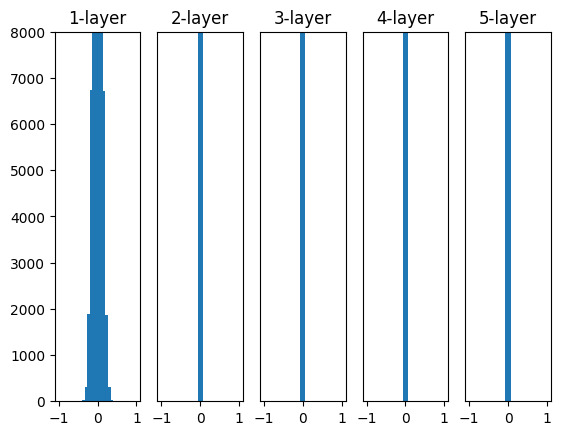

In [20]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('small')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 8000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

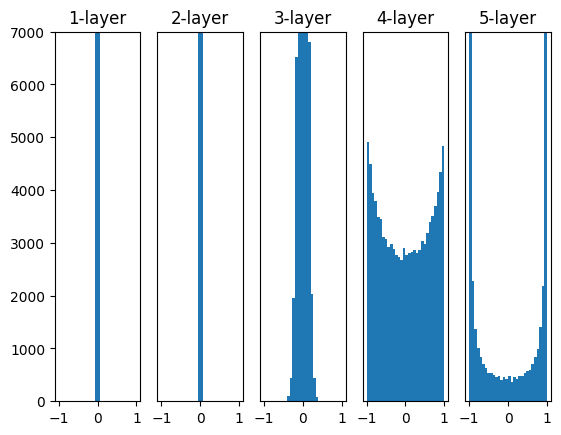

In [21]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('large')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

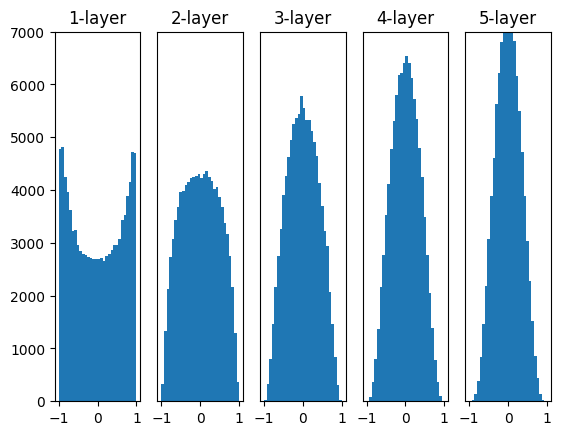

In [22]:
# Xavier Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

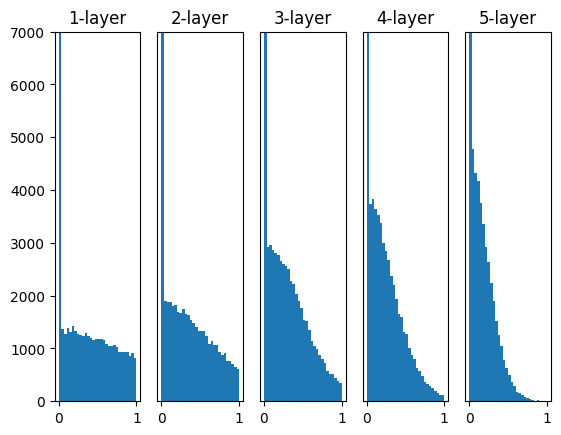

In [15]:
# He Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


above codes compares different initializatioin methods; 'large', 'small', Xavier, He

We can see that if we initialize parameters with too large or too small standard deviation, then the learning has exploding/ vanishing gradient problems.



## 3. CNN
*     Reference. https://justkode.kr/deep-learning/pytorch-cnn/

In [ ]:
## GPU (Optional)
# 런타임 - 런타임 유형 변경 - T4 GPU
# !nvidia-smi

In [ ]:
# Question
# Run two cells below and try to explain the
# change of tensor size after passing through the layers
# e.g.) Conv1: [10, 1, 20, 20] -> [10, 3, 16, 16], because --

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1)
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1)
    self.fc1 = nn.Linear(10 * 12 * 12, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.conv1(x))
    print("After conv1", x.size())
    x = F.relu(self.conv2(x))
    print("After conv2",x.size())
    x = x.view(-1, 10 * 12 * 12)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))  # Input Size: (10, 1, 20, 20)

Before torch.Size([10, 1, 20, 20])
After conv1 torch.Size([10, 3, 16, 16])
After conv2 torch.Size([10, 10, 12, 12])
After dimension reduction torch.Size([10, 1440])
After fc1 torch.Size([10, 50])
After fc2 torch.Size([10, 10])


In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.max_pool1 = nn.MaxPool2d(kernel_size=2)
    self.max_pool2 = nn.MaxPool2d(kernel_size=2)
    self.fc1 = nn.Linear(10 * 5 * 5, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.max_pool1(x))
    print("After max_pool1", x.size())
    x = F.relu(self.max_pool2(x))
    print("After max_pool2",x.size())
    x = x.view(-1, 10 * 5 * 5)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))

Before torch.Size([10, 1, 20, 20])
After max_pool1 torch.Size([10, 1, 10, 10])
After max_pool2 torch.Size([10, 1, 5, 5])
After dimension reduction torch.Size([1, 250])
After fc1 torch.Size([1, 50])
After fc2 torch.Size([1, 10])


In [25]:
# Now let's construct a CNN model

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [27]:
train_data = datasets.MNIST('./data/', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=50, shuffle=True)

test_data = datasets.MNIST('./data/', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=50, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)>



RuntimeError: Error downloading train-images-idx3-ubyte.gz

In [28]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [29]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

In [30]:
cnn.train()
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index % 100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

NameError: name 'train_loader' is not defined

In [31]:
# Quick Question
# Write an explanation of the code below (evaluation cell only!)

In [32]:
cnn.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    output = cnn(data)
    test_loss += criterion(output, target).item()
    pred = output.argmax(dim=1, keepdim=True)
    correct += pred.eq(target.view_as(pred)).sum().item()
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

NameError: name 'test_loader' is not defined

In [33]:
# Question (optional)
# Try to adjust the hyperparameters (kernel size, # of conv layers, ...)
# and get better results than the baseline (default) model!!

질문: 왜 다운로드 에러가 뜨는 건가요? 

### The End.

##### Please upload your Colab file @Github https://github.com/duneag2/intro-dl/tree/main/Assignment5

*   First, make your folder by your name (e.g. seungeun)
*   Then upload your "Jupyter Notebook" file under that directory

###### Need Help?



*   Please refer to this link https://yeko90.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-colab%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EC%95%95%EC%B6%95%ED%8C%8C%EC%9D%BC-%ED%92%80%EA%B8%B0 OR
*   Just save your Jupyter Notebook (.ipynb) file in here (colab) and upload via 'Add file' - 'Upload files' https://nthree.tistory.com/60